In [11]:
import pandas as pd

# Buat data penjualan toko
data = {
    "Tanggal": [
        "2025-02-01", "2025-02-02", "2025-02-03", "2025-02-04", "2025-02-05",
        "2025-02-06", "2025-02-07", "2025-02-08", "2025-02-09", "2025-02-10",
        "2025-02-11", "2025-02-12", "2025-02-13", "2025-02-14", "2025-02-15",
        "2025-02-16", "2025-02-17", "2025-02-18", "2025-02-19", "2025-02-20",
        "2025-02-21", "2025-02-22", "2025-02-23", "2025-02-24", "2025-02-25",
        "2025-02-26", "2025-02-27", "2025-02-28", "2025-02-28", "2025-03-01"
    ],
    "Produk": [
        "Pensil", "Pulpen", "Buku Tulis", "Penghapus", "Tipe-X", "Spidol", "Pensil Warna",
        "Kertas HVS", "Penggaris", "Stapler", "Pensil", "Pulpen", "Buku Tulis", "Penghapus",
        "Tipe-X", "Spidol", "Pensil Warna", "Kertas HVS", "Penggaris", "Stapler", "Pensil",
        "Pulpen", "Buku Tulis", "Penghapus", "Tipe-X", "Spidol", "Pensil Warna", "Kertas HVS",
        "Penggaris", "Stapler"
    ],
    "Jumlah Terjual": [
        10, 12, 15, 8, 7, 14, 6, 9, 11, 13, 9, 14, 13, 10, 6, 12, 7, 8, 15, 10,
        11, 12, 9, 8, 14, 13, 6, 7, 15, 12
    ],
    "Stok": [
        20, 18, 25, 22, 19, 21, 17, 23, 16, 15, 20, 18, 25, 22, 19, 21, 17, 23, 16, 15,
        20, 18, 25, 22, 19, 21, 17, 23, 16, 15
    ],
    "Harga Satuan": [
        3000, 5000, 12000, 2000, 7000, 8000, 15000, 25000, 5000, 20000, 3000, 5000, 12000,
        2000, 7000, 8000, 15000, 25000, 5000, 20000, 3000, 5000, 12000, 2000, 7000, 8000,
        15000, 25000, 5000, 20000
    ]
}


# Simpan dalam DataFrame
df = pd.DataFrame(data)

# Simpan sebagai file CSV
df.to_csv("data_penjualan_alattulis.csv", index=False)

print("File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'!")

File CSV berhasil dibuat dan disimpan sebagai 'data_penjualan_latihan.csv'!


In [12]:
# Membaca file csv
df = pd.read_csv("data_penjualan_alattulis.csv")

# Menampilkan seluruh data penjualan
print(df.head(50))

       Tanggal        Produk  Jumlah Terjual  Stok  Harga Satuan
0   2025-02-01        Pensil              10    20          3000
1   2025-02-02        Pulpen              12    18          5000
2   2025-02-03    Buku Tulis              15    25         12000
3   2025-02-04     Penghapus               8    22          2000
4   2025-02-05        Tipe-X               7    19          7000
5   2025-02-06        Spidol              14    21          8000
6   2025-02-07  Pensil Warna               6    17         15000
7   2025-02-08    Kertas HVS               9    23         25000
8   2025-02-09     Penggaris              11    16          5000
9   2025-02-10       Stapler              13    15         20000
10  2025-02-11        Pensil               9    20          3000
11  2025-02-12        Pulpen              14    18          5000
12  2025-02-13    Buku Tulis              13    25         12000
13  2025-02-14     Penghapus              10    22          2000
14  2025-02-15        Tip

In [13]:
# Cek apakah ada data kosong
print(df.isnull().sum())

# Konversi kolom "Tanggal" ke format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Tambahkan kolom "total penjualan"
df["Total Penjualan"] = df["Jumlah Terjual"] * df["Harga Satuan"]

# Tambahkan kolom "keuntungan" (asumsi modal 10.000 per produk)
df["Keuntungan"] = df["Total Penjualan"] - (df["Jumlah Terjual"] * 10000)

# Mengatur tampilan agar tidak terpotong ke bawah
pd.set_option('display.expand_frame_repr', False)

# Menampilkan hasil transformasi
print(df.head(30))

Tanggal           0
Produk            0
Jumlah Terjual    0
Stok              0
Harga Satuan      0
dtype: int64
      Tanggal        Produk  Jumlah Terjual  Stok  Harga Satuan  Total Penjualan  Keuntungan
0  2025-02-01        Pensil              10    20          3000            30000      -70000
1  2025-02-02        Pulpen              12    18          5000            60000      -60000
2  2025-02-03    Buku Tulis              15    25         12000           180000       30000
3  2025-02-04     Penghapus               8    22          2000            16000      -64000
4  2025-02-05        Tipe-X               7    19          7000            49000      -21000
5  2025-02-06        Spidol              14    21          8000           112000      -28000
6  2025-02-07  Pensil Warna               6    17         15000            90000       30000
7  2025-02-08    Kertas HVS               9    23         25000           225000      135000
8  2025-02-09     Penggaris              11    16 

In [8]:
!pip install scikit-learn

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Pilih fitur (X) dan target (y)
X = df[["Jumlah Terjual", "Stok"]]
y = (df["Stok"] < 5).astype(int)

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat model Decision Tree
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Evaluasi model
y_pred = model.predict(X_test)
print("Akurasi Model: ", accuracy_score (y_test, y_pred))

Akurasi Model:  1.0


In [18]:
# Contoh produk baru (jumlah terjual 8, stok tersisa 3)
produk_baru = [[8, 3]]
prediksi = model.predict(produk_baru)

if prediksi[0] == 1:
    print("Produk perlu di-restock!")
else:
    print("Stok masih cukup.")

Stok masih cukup.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


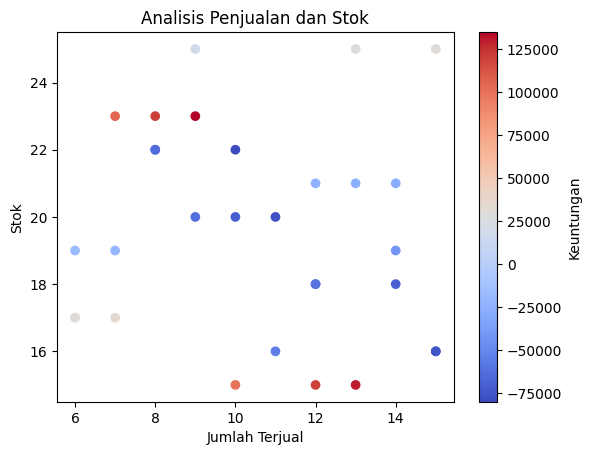

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df["Jumlah Terjual"], df["Stok"], c=df["Keuntungan"], cmap="coolwarm")
plt.xlabel("Jumlah Terjual")
plt.ylabel("Stok")
plt.title("Analisis Penjualan dan Stok")
plt.colorbar (label="Keuntungan")
plt.show()